In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('../../data/results/csv/curves_ftse.csv') 

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (2161, 12)

Column Names:
['strategy', 'date', 'available_capital', 'invested_capital', 'total_capital', 'daily_pnl', 'daily_costs', 'active_positions', 'cumulative_pnl', 'cumulative_costs', 'net_performance', 'performance_pct']

First 5 rows:
                    strategy        date  available_capital  invested_capital  \
0  Cluster_Bollinger_Sliding  2024-01-02       98005.673626         1989.9782   
1  Cluster_Bollinger_Sliding  2024-01-03       98005.673626         1989.9782   
2  Cluster_Bollinger_Sliding  2024-01-04       98005.673626         1989.9782   
3  Cluster_Bollinger_Sliding  2024-01-05       98005.673626         1989.9782   
4  Cluster_Bollinger_Sliding  2024-01-06       98005.673626         1989.9782   

   total_capital  daily_pnl  daily_costs  active_positions  cumulative_pnl  \
0   99995.651826        0.0     4.348174               2.0             0.0   
1   99995.651826        0.0     0.000000               2.0             0.0   
2   99995.651826    

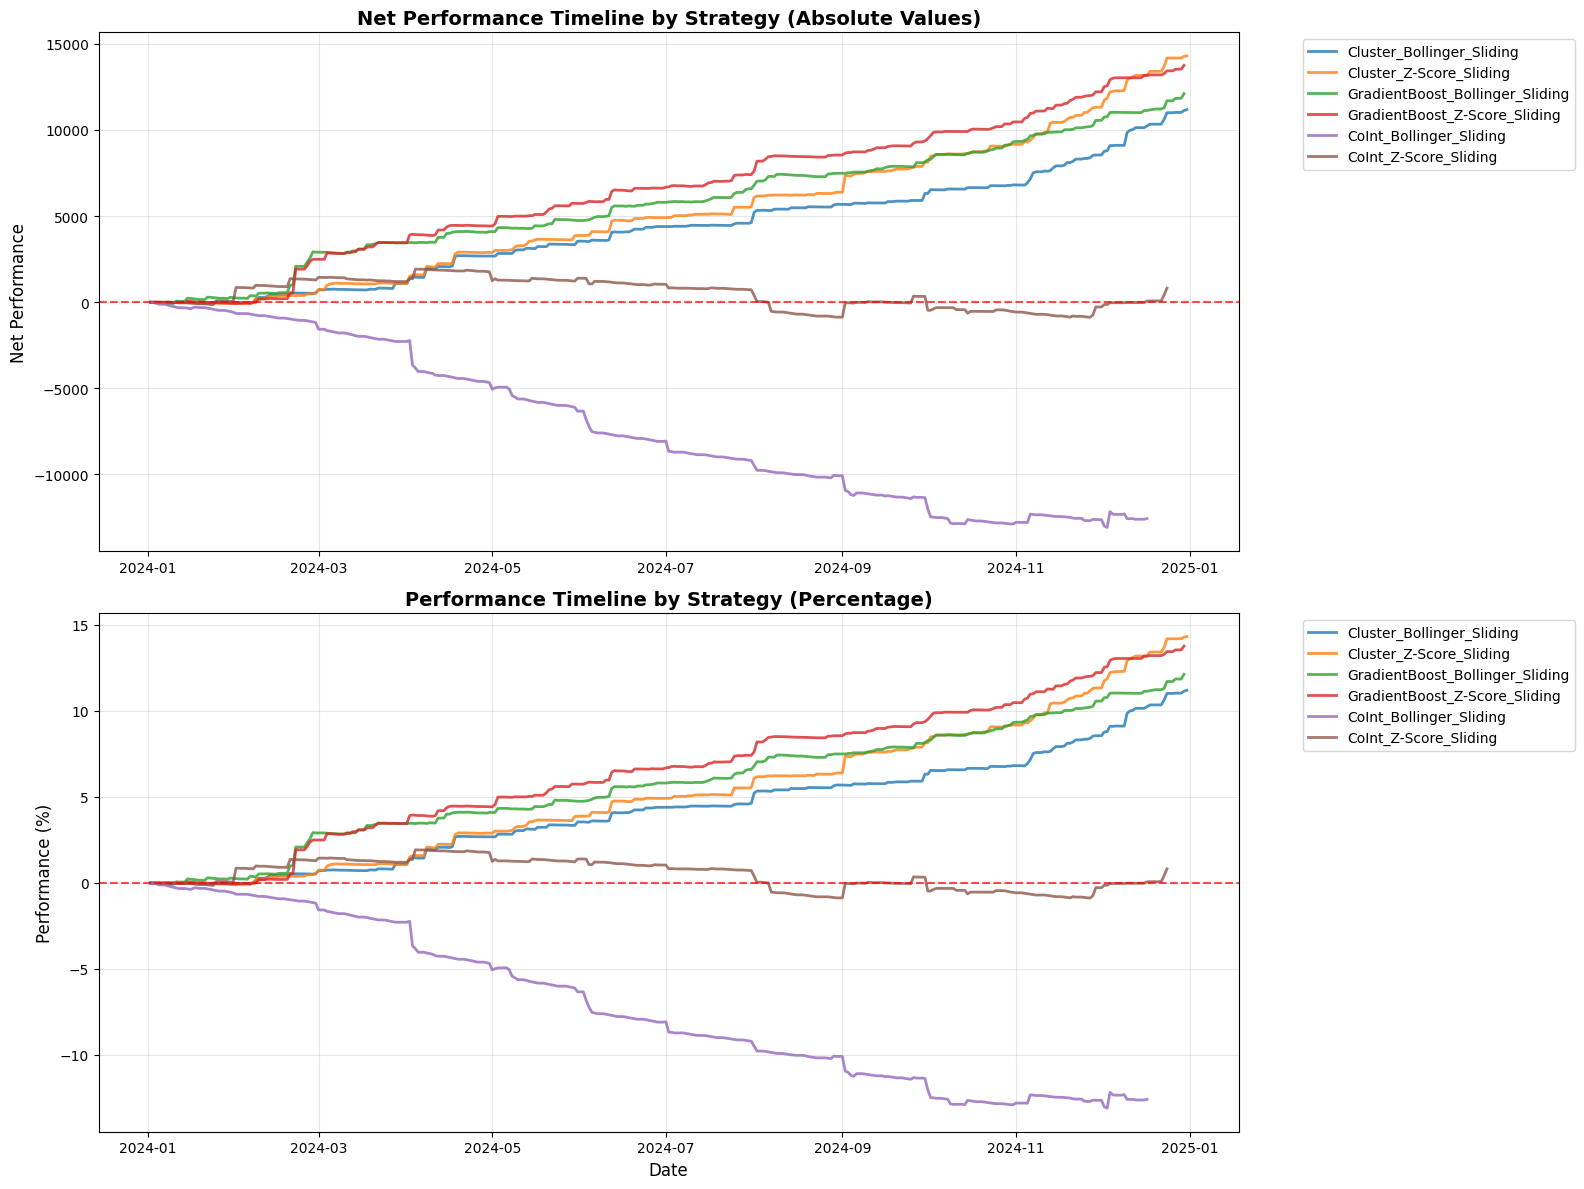

=== STRATEGY PERFORMANCE RANKING ===
1. Cluster_Z-Score_Sliding
   Final Net Performance: 14,298.57
   Final Performance %: 14.299%

2. GradientBoost_Z-Score_Sliding
   Final Net Performance: 13,749.68
   Final Performance %: 13.750%

3. GradientBoost_Bollinger_Sliding
   Final Net Performance: 12,110.18
   Final Performance %: 12.110%

4. Cluster_Bollinger_Sliding
   Final Net Performance: 11,181.33
   Final Performance %: 11.181%

5. CoInt_Z-Score_Sliding
   Final Net Performance: 809.35
   Final Performance %: 0.809%

6. CoInt_Bollinger_Sliding
   Final Net Performance: -12,572.43
   Final Performance %: -12.572%



In [6]:
# Performance Timeline für alle Strategien getrennt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Farben für die verschiedenen Strategien
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
strategies = df['strategy'].unique()

# Plot 1: Net Performance (absolute Werte)
for i, strategy in enumerate(strategies):
    strategy_data = df[df['strategy'] == strategy].sort_values('date')
    ax1.plot(strategy_data['date'], strategy_data['net_performance'], 
             linewidth=2, label=strategy, color=colors[i], alpha=0.8)

ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax1.set_title('Net Performance Timeline by Strategy (Absolute Values)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Net Performance', fontsize=12)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Performance in Prozent  
for i, strategy in enumerate(strategies):
    strategy_data = df[df['strategy'] == strategy].sort_values('date')
    ax2.plot(strategy_data['date'], strategy_data['performance_pct'] * 100, 
             linewidth=2, label=strategy, color=colors[i], alpha=0.8)

ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Performance Timeline by Strategy (Percentage)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Performance (%)', fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance Ranking
print("=== STRATEGY PERFORMANCE RANKING ===")
strategy_performance = []
for strategy in strategies:
    strategy_data = df[df['strategy'] == strategy]
    final_performance = strategy_data['net_performance'].iloc[-1]
    final_pct = strategy_data['performance_pct'].iloc[-1] * 100
    strategy_performance.append((strategy, final_performance, final_pct))

# Sortieren nach finaler Performance
strategy_performance.sort(key=lambda x: x[1], reverse=True)

for i, (strategy, perf, pct) in enumerate(strategy_performance, 1):
    print(f"{i}. {strategy}")
    print(f"   Final Net Performance: {perf:,.2f}")
    print(f"   Final Performance %: {pct:.3f}%")
    print()

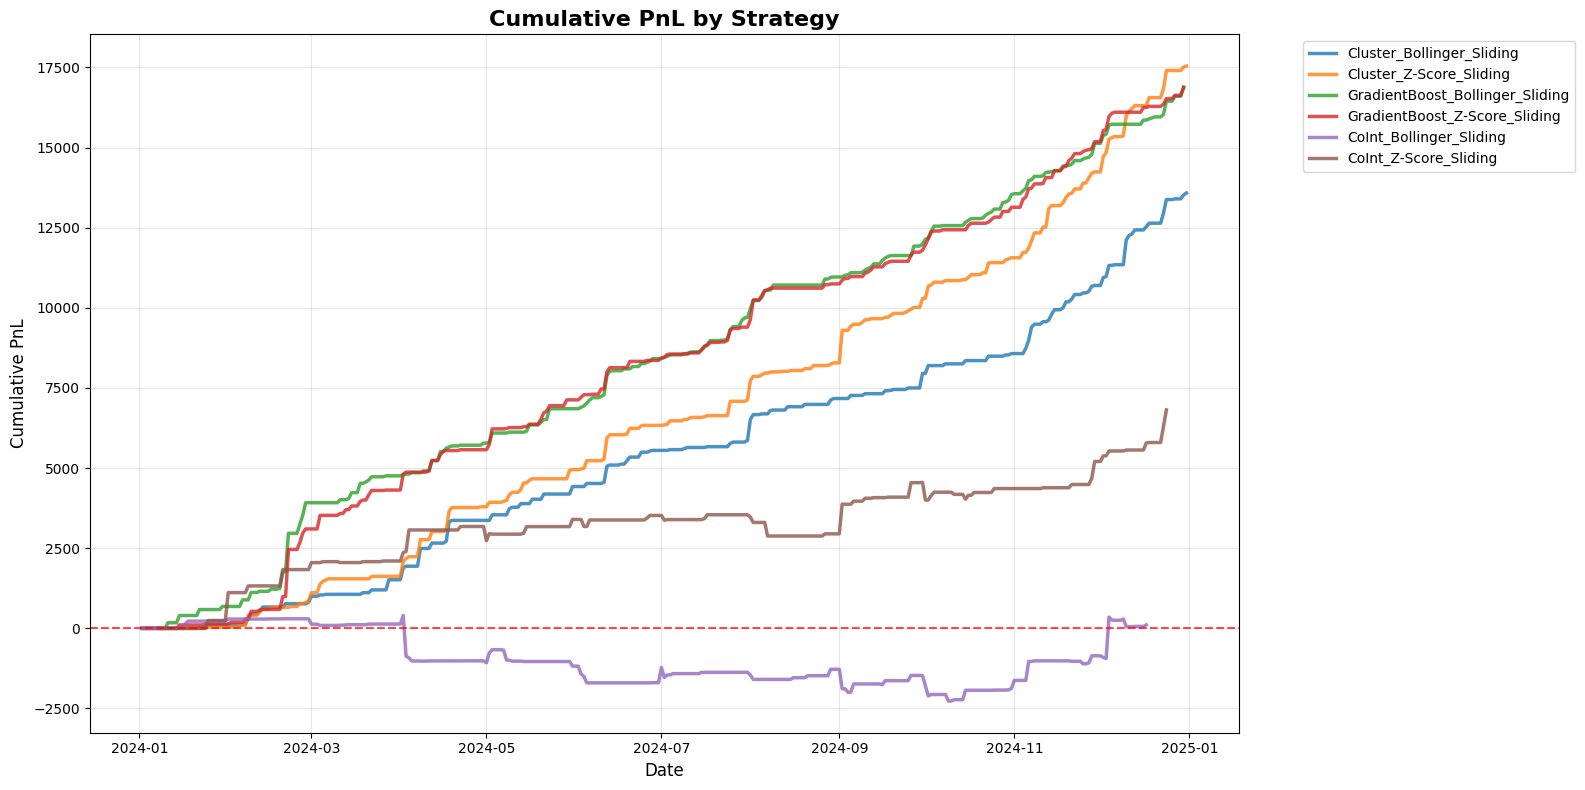

In [8]:
# Cumulative PnL Chart
plt.figure(figsize=(16, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
strategies = df['strategy'].unique()

for i, strategy in enumerate(strategies):
    strategy_data = df[df['strategy'] == strategy].sort_values('date')
    plt.plot(strategy_data['date'], strategy_data['cumulative_pnl'], 
             linewidth=2.5, label=strategy, color=colors[i], alpha=0.8)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Cumulative PnL by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative PnL', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

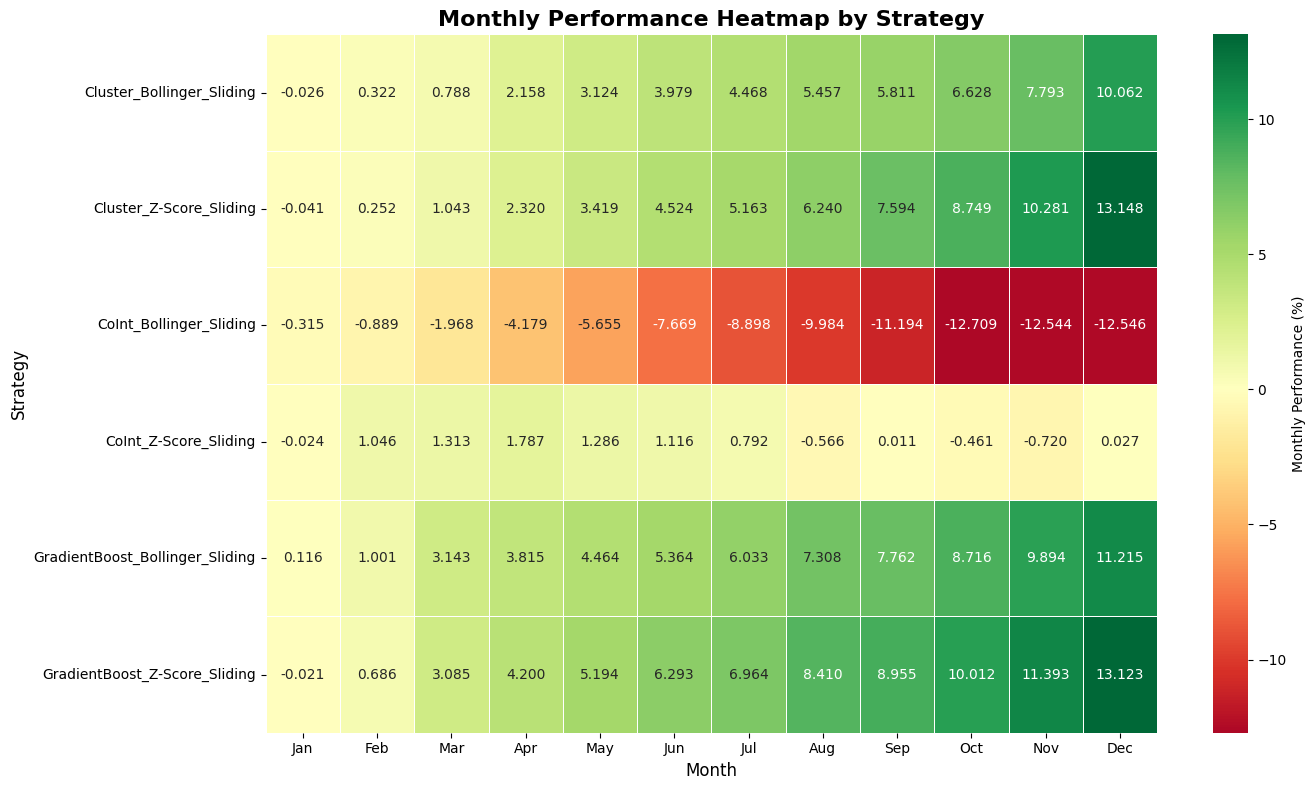

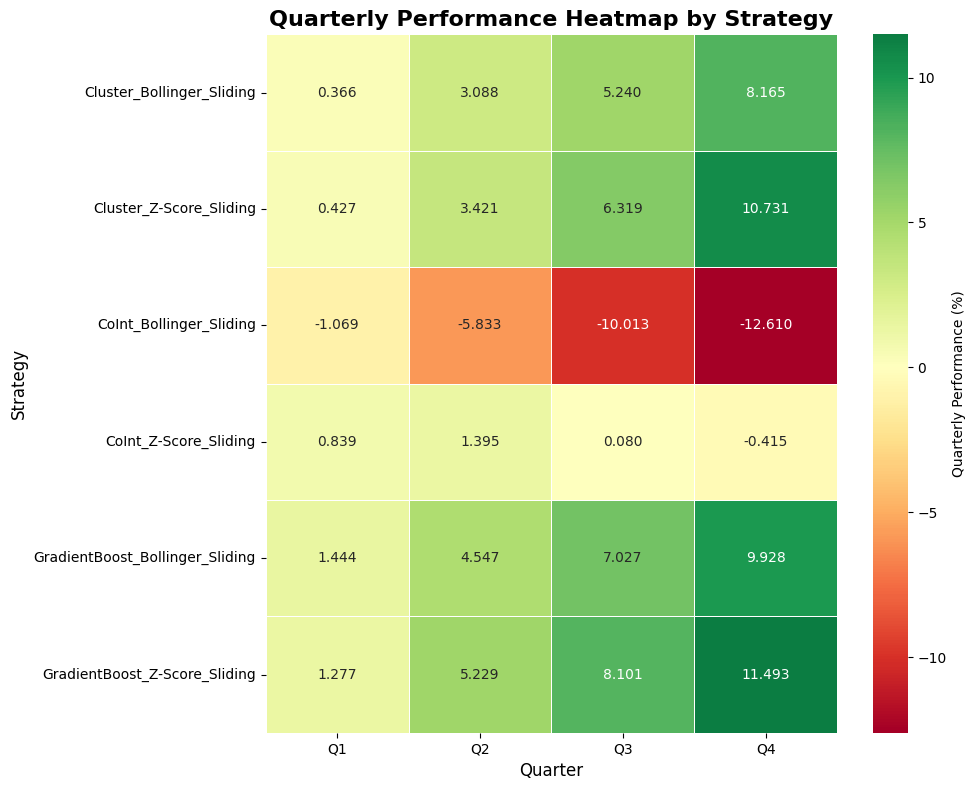

In [13]:
# Performance Heatmap nach Monaten
import pandas as pd

# Daten vorbereiten
df_heatmap = df.copy()
df_heatmap['date'] = pd.to_datetime(df_heatmap['date'])
df_heatmap['year'] = df_heatmap['date'].dt.year
df_heatmap['month'] = df_heatmap['date'].dt.month
df_heatmap['month_name'] = df_heatmap['date'].dt.strftime('%b')

# Monatliche Performance berechnen
monthly_perf = df_heatmap.groupby(['strategy', 'year', 'month', 'month_name'])['performance_pct'].mean().reset_index()
monthly_perf['performance_pct'] = monthly_perf['performance_pct'] * 100

# Pivot für Heatmap
heatmap_data = monthly_perf.pivot_table(
    values='performance_pct', 
    index='strategy', 
    columns='month_name', 
    aggfunc='mean'
)

# Month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data.reindex(columns=month_order)

# Heatmap plotten
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Monthly Performance (%)'}, 
            linewidths=0.5)

plt.title('Monthly Performance Heatmap by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Strategy', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Quarterly View
df_heatmap['quarter'] = df_heatmap['date'].dt.quarter
quarterly_perf = df_heatmap.groupby(['strategy', 'quarter'])['performance_pct'].mean().reset_index()
quarterly_perf['performance_pct'] = quarterly_perf['performance_pct'] * 100

heatmap_quarterly = quarterly_perf.pivot_table(
    values='performance_pct',
    index='strategy', 
    columns='quarter'
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_quarterly, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Quarterly Performance (%)'}, 
            linewidths=0.5)

plt.title('Quarterly Performance Heatmap by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Strategy', fontsize=12)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

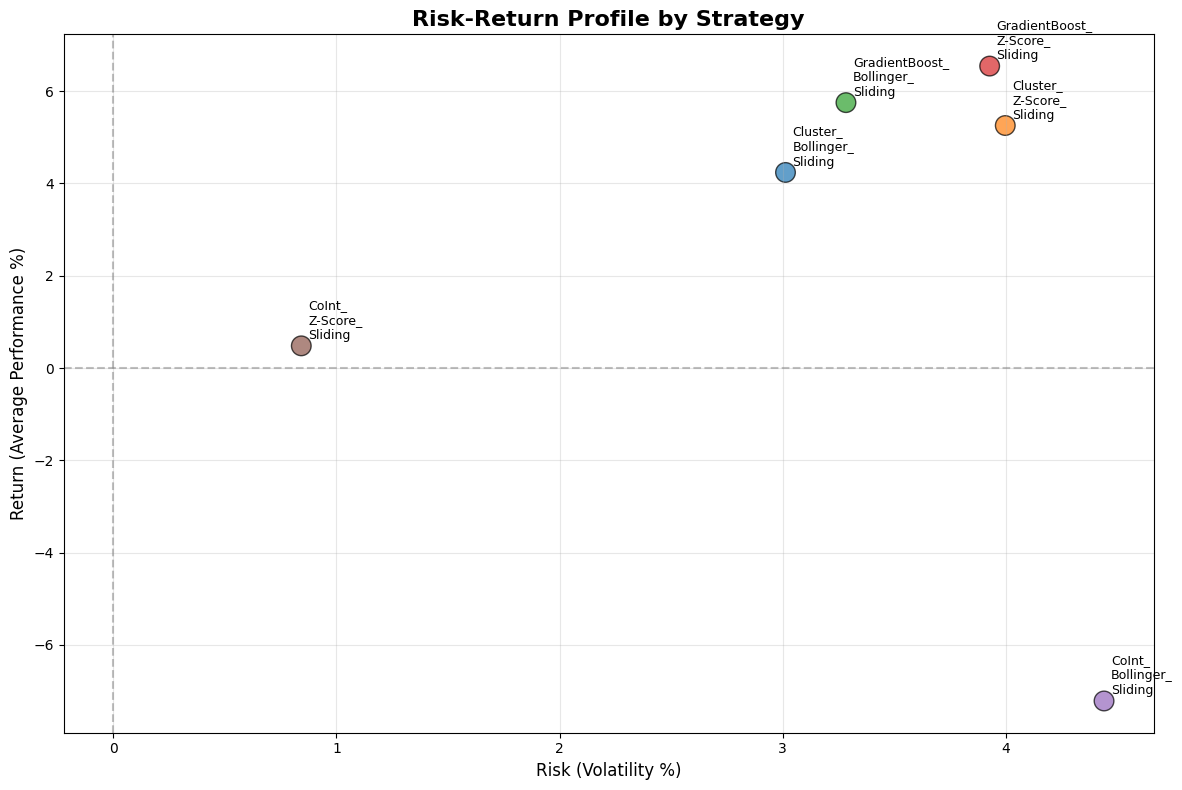

=== RISK-RETURN STATISTICS ===
Cluster_Bollinger_Sliding: Return=4.2387%, Risk=3.0130%
Cluster_Z-Score_Sliding: Return=5.2556%, Risk=3.9980%
GradientBoost_Bollinger_Sliding: Return=5.7516%, Risk=3.2839%
GradientBoost_Z-Score_Sliding: Return=6.5435%, Risk=3.9280%
CoInt_Bollinger_Sliding: Return=-7.2130%, Risk=4.4408%
CoInt_Z-Score_Sliding: Return=0.4816%, Risk=0.8426%


In [14]:
# Risk-Return Scatter Plot
strategies = df['strategy'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

returns = []
risks = []
strategy_names = []

for strategy in strategies:
    strategy_data = df[df['strategy'] == strategy]
    
    # Return = Average Performance
    avg_return = strategy_data['performance_pct'].mean() * 100
    
    # Risk = Volatility of Performance  
    volatility = strategy_data['performance_pct'].std() * 100
    
    returns.append(avg_return)
    risks.append(volatility)
    strategy_names.append(strategy)

# Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(risks, returns, s=200, c=colors[:len(strategies)], alpha=0.7, edgecolors='black')

# Labels für jeden Punkt
for i, strategy in enumerate(strategy_names):
    plt.annotate(strategy.replace('_', '_\n'), (risks[i], returns[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9, ha='left')

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.title('Risk-Return Profile by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Risk (Volatility %)', fontsize=12)
plt.ylabel('Return (Average Performance %)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print Stats
print("=== RISK-RETURN STATISTICS ===")
for i, strategy in enumerate(strategy_names):
    print(f"{strategy}: Return={returns[i]:.4f}%, Risk={risks[i]:.4f}%")

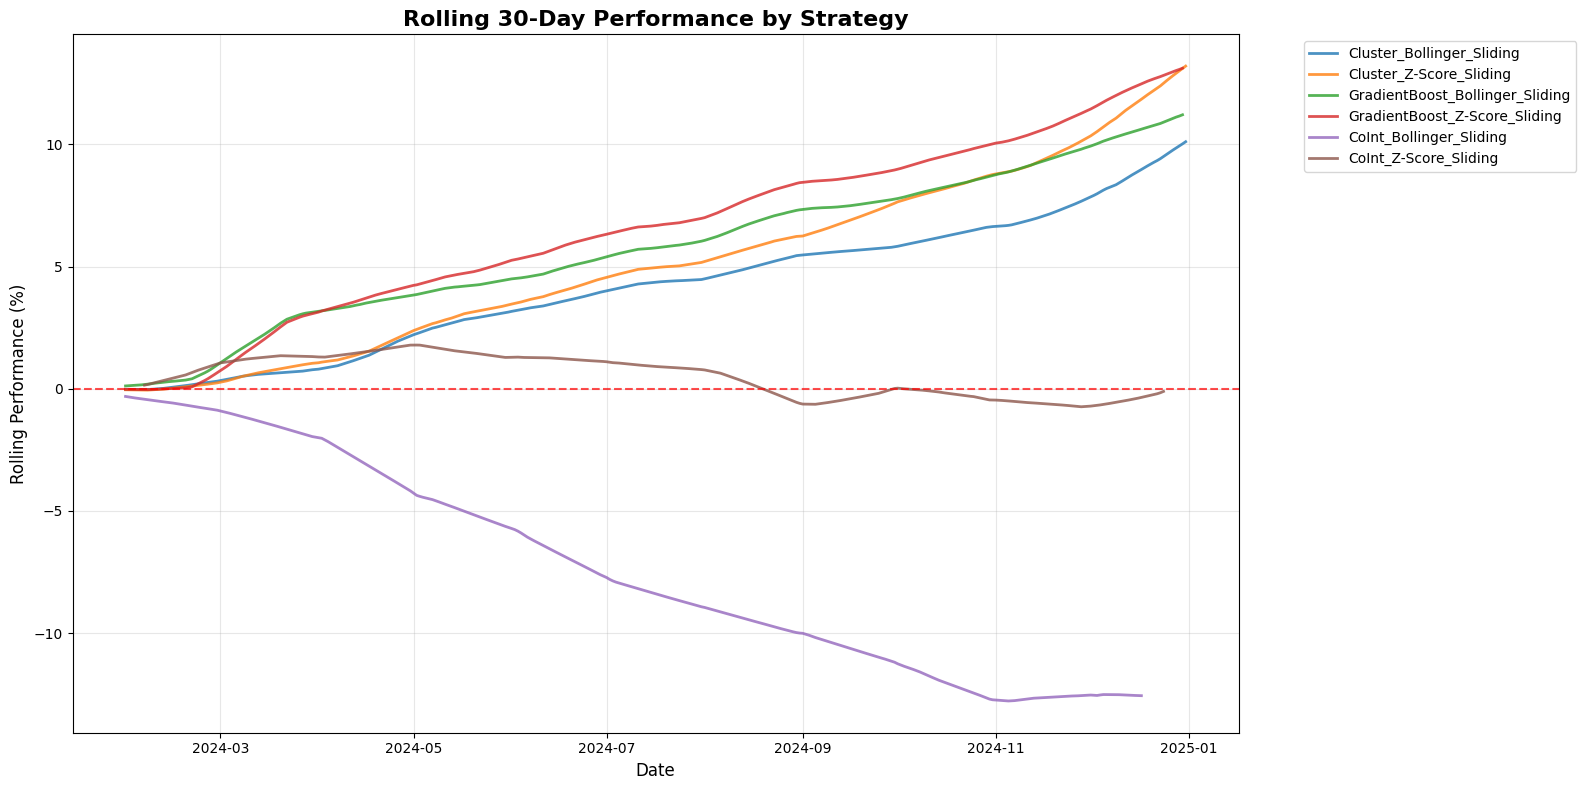

In [15]:
# Rolling Performance (30-day window)
plt.figure(figsize=(16, 8))

strategies = df['strategy'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, strategy in enumerate(strategies):
    strategy_data = df[df['strategy'] == strategy].sort_values('date').copy()
    
    # 30-Tage Rolling Performance berechnen
    strategy_data['rolling_30d_perf'] = strategy_data['performance_pct'].rolling(window=30).mean() * 100
    
    plt.plot(strategy_data['date'], strategy_data['rolling_30d_perf'], 
             linewidth=2, label=strategy, color=colors[i], alpha=0.8)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Rolling 30-Day Performance by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Performance (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

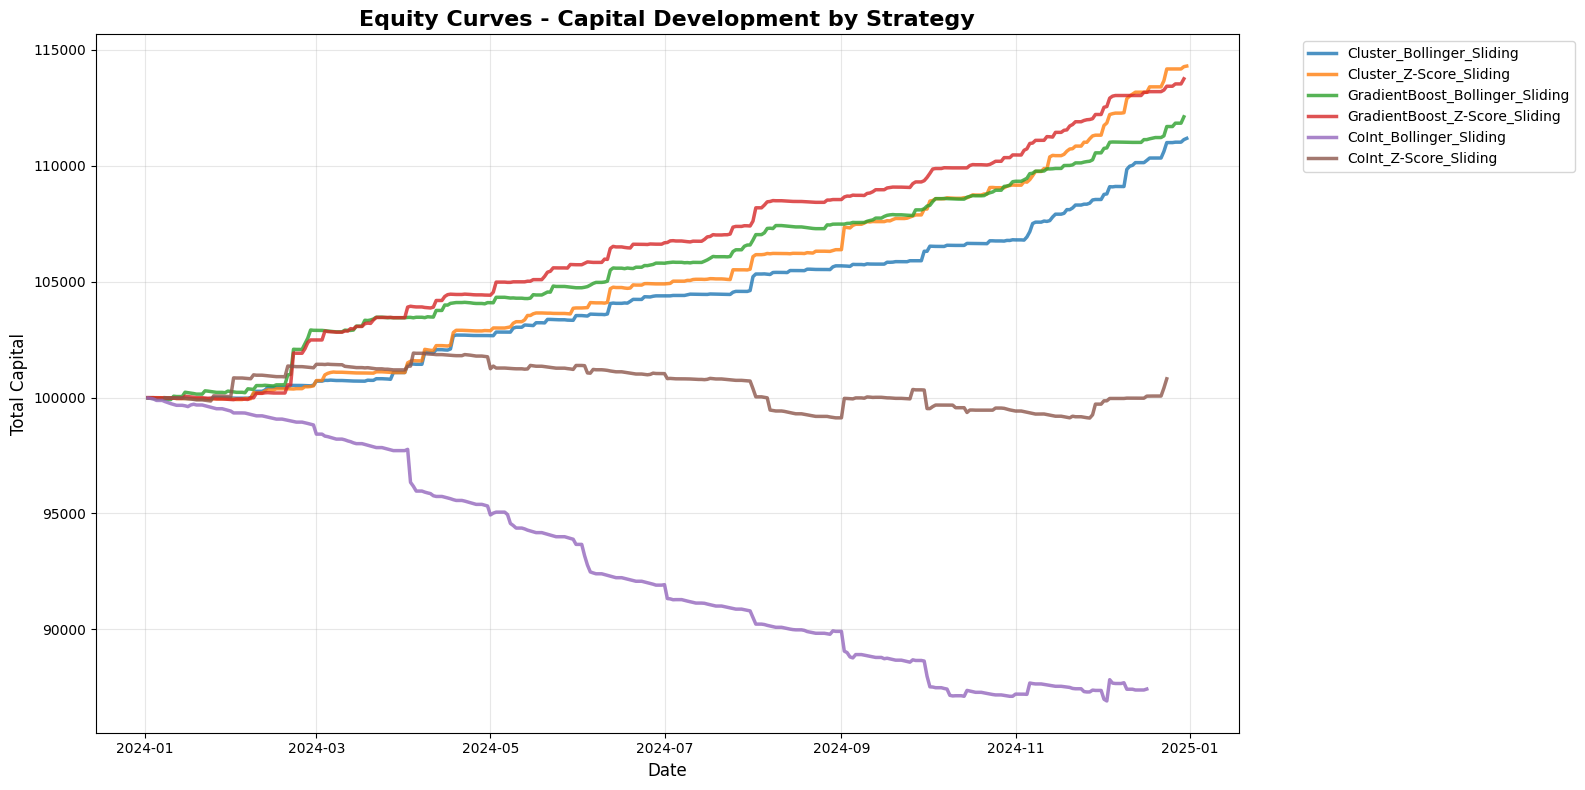

In [16]:
# Equity Curves (Total Capital Development)
plt.figure(figsize=(16, 8))

strategies = df['strategy'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, strategy in enumerate(strategies):
    strategy_data = df[df['strategy'] == strategy].sort_values('date')
    
    # Equity = Start Capital + Cumulative PnL
    equity = strategy_data['total_capital']
    
    plt.plot(strategy_data['date'], equity, 
             linewidth=2.5, label=strategy, color=colors[i], alpha=0.8)

plt.title('Equity Curves - Capital Development by Strategy', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Capital', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()